In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import os
import itertools
from enum import Enum

learning_rate = 0.01
num_steps = 2000
batch_size = 100
display_step = 100

FIELD_X = 1052
FIELD_DX = 66
FIELD_Y = 221
FIELD_DY = 57
FIELD_SIZE = 6

SCAN_RADIUS = 17



In [2]:
class Marble(Enum):
    none = 0
    Salt = 1
    Air = 2
    Fire = 3
    Water = 4
    Earth = 5
    Vitae = 6
    Mors = 7
    Quintessence = 8
    Quicksilver = 9
    Lead = 10
    Tin = 11
    Iron = 12
    Copper = 13
    Silver = 14
    Gold = 15

    def symbol(self):
        if self.value is self.none.value:
            return "-"
        if self.value in range(self.Quicksilver.value, self.Gold.value + 1):
            return self.name[0].upper()
        else:
            return self.name[0].lower()

def field_positions():
    d = FIELD_SIZE - 1
    result = []
    for y in range(-d, d + 1):
        for x in range(-d, d + 1):
            if not abs(y - x) > d:
                result.append((x + d, y + d))
    return result


def pixels_to_scan():
    pxs = []
    for dy in range(-SCAN_RADIUS + 1, SCAN_RADIUS):
        for dx in range(-SCAN_RADIUS + 1, SCAN_RADIUS):
            pxs.append((dx, dy))
    return pxs


def lightness_at(img, x, y):
    _min, _max = img.getpixel((x, y))
    return _min / 255


def edges_at(img, x, y):
    result = []
    for (xx, yy) in PIXELS_TO_SCAN:
        result.append(lightness_at(img, x + xx, y + yy))
    return result


def img_pos(x, y):
    return FIELD_X + FIELD_DX * (x * 2 - y) / 2, FIELD_Y + FIELD_DY * y


FIELD_POSITIONS = field_positions()
PIXELS_TO_SCAN = pixels_to_scan()

MARBLE_BY_SYMBOL = dict(zip([Marble.symbol(e) for e in Marble], [e.name for e in Marble]))


In [3]:
def load_mnist():
    images, labels = [], []
    for i in range(1, 7):
        img = Image.open(os.path.join("sample", str(i) + ".png")).convert('LA')
        samples = list(itertools.chain.from_iterable(
            [lines.split() for lines in open(os.path.join("sample", str(i) + ".txt"), "r").readlines()]))
        for j, (pos, symbol) in enumerate(zip(FIELD_POSITIONS, samples)):
            marble = MARBLE_BY_SYMBOL[symbol]
            edge_pixels = edges_at(img, *img_pos(*pos))
            images.append(edge_pixels)
            labels.append(Marble[marble].value)
    return np.array(images), np.array(labels)
X_train, y_train = load_mnist()

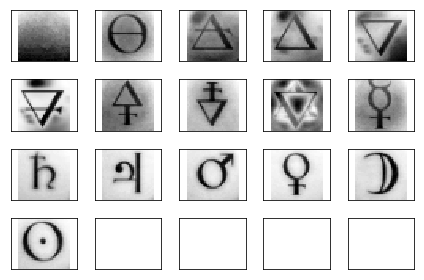

In [4]:

%matplotlib inline

fig, ax = plt.subplots(nrows=4, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(16):
    img = X_train[y_train == i][0].reshape(33, 33)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

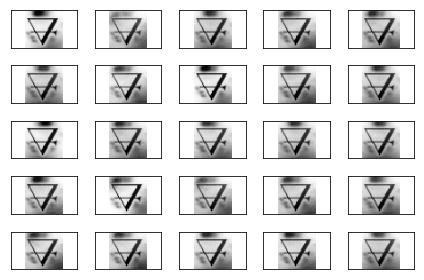

In [5]:

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(33, 33)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

In [8]:
from keras.models import Sequential

model = Sequential()

ModuleNotFoundError: No module named 'keras.models'; 'keras' is not a package